## Implement the linear regression on the salary prediction based on the given set of training data samples. Read the training data from a .csv file.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### seaborn: A data visualization library based on matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.

### sklearn.model_selection: A module in scikit-learn library that provide various fuctions for splitting the dataset into train and test sets, such as train_test_split().

### statsmodels.api: A Python model that provides various dstatistical models and functions, including linear regression models. 

### sklearn.metrics: A module in scikit_learn library that provides a suite of evaluation metrics, including mean squared error(MSE) and R-squared (R2) score,

In [10]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 453.5 kB/s eta 0:00:21
   --- ------------------------------------ 0.8/9.8 MB 589.1 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/9.8 MB 589.1 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/9.8 MB 589.1 kB/s eta 0:00:16
   ---- ----------------------------------- 1.0/9.8 MB 559.3 kB/s eta 0:00:16
   ---- ----------------------------------- 1.0/9.8 MB 559.3 kB/s eta 0:00:16
   ----- ---------------------------------- 1.3/9.8 MB 583.5 kB/s eta 0:00:15
   ------ --------------------------------- 1.6/9.8 MB 640.3 kB/s eta 0:00:13
   ------ ---------------------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
#import data
data = pd.read_csv('Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [13]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [12]:
 data.shape

(30, 2)

#### Min years of experience is 1.1 with a salary of 27414.4 and max years of experience is 10.5 with a salary of 122391.

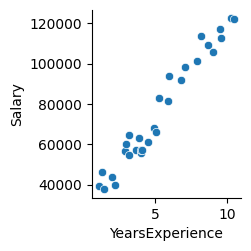

In [14]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience' , data=data)

#### data.corr() calculate the pairwise correlation between all the columns in a pandas DataFrame data. This correlation matrix can be useful for identifying the strength and direction of the relationships between variables in the dataset. It can also be visualized using heatmaps or other graphical tools to make it easier to interpret.

In [15]:
#checking the correlation of the data.
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [16]:
x=data['YearsExperience']
y=data['Salary']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
x_train.shape

(21,)

In [19]:
x_test.shape

(9,)

### Model Building:

implement ordinary least squares(OLS) linear regression using the statsmodels library:
x_train_sm = sm.add_constant(x_train): This adds a column of 1s to the x_train DataFrame, which serves as the intercept term in the regression model. The resultin DtaFrame x_train_sm is used in the regression model fitting.

In [20]:
x_train_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()

In [21]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              685.3
Date:                Mon, 17 Mar 2025   Prob (F-statistic):                    6.00e-17
Time:                        12:54:43   Log-Likelihood:                         -228.79
No. Observations:                  21   AIC:                                      459.6
Df Residuals:                      20   BIC:                                      460.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------